In [1]:
import numpy as np

In [2]:
csv = np.loadtxt("database_moves.csv", delimiter=';', dtype='int64')
data = csv.reshape((60, 9, 3))

In [3]:
Y_player1 = {}
Y_player2 = {}
for fc in range(9):
    Y_player1[fc] = []
    Y_player2[fc] = []
for turn in range(len(data)):
    for field_category in range(9):
        games_played = data[turn][field_category][2]
        won_1 = data[turn][field_category][0]
        won_2 = data[turn][field_category][1]
        if games_played != 0:
            chance_1 = won_1 / games_played
            chance_2 = won_2 / games_played
        else:
            chance_1 = 0
            chance_2 = 0
        Y_player1[field_category].append(chance_1)
        Y_player2[field_category].append(chance_2)

In [11]:
import matplotlib.pyplot as plt
import seaborn           as sns
def plot_category_scatter(c):
    X = [i+1 for i in range(60)]
    plt.figure(figsize=(10, 8))
    sns.set(style='darkgrid')
    plt.title('Win Propability for Field Category')
    plt.axvline(x=0.0, c='k')
    plt.axhline(y=0.0, c='k')
    plt.xlabel('Turn')
    plt.ylabel('Probability')
    plt.xticks(np.arange(0, 60, step=2.0))
    plt.yticks(np.arange(0, .7, step=0.1))
    plt.scatter(X, Y_player1[c], color='b') # plot player1 in blue
    plt.scatter(X, Y_player2[c], color='r') # plot player2 in red
    plt.savefig(f"othello-scatter-field_category{c}.pdf")
def plot_category(c):
    X = [i+1 for i in range(60)]
    plt.figure(figsize=(10, 8))
    sns.set(style='darkgrid')
    plt.title('Win Propability for Field Category')
    plt.axvline(x=0.0, c='k')
    plt.axhline(y=0.0, c='k')
    plt.xlabel('Turn')
    plt.ylabel('Probability')
    plt.xticks(np.arange(0, 60, step=2.0))
    plt.yticks(np.arange(0, .7, step=0.1))
    plt.plot(X, Y_player1[c], color='b') # plot player1 in blue
    plt.plot(X, Y_player2[c], color='r') # plot player2 in red
    plt.savefig(f"othello-field_category{c}.pdf")

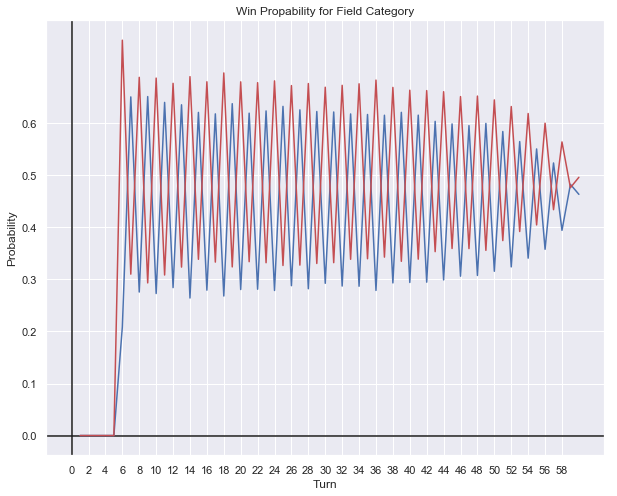

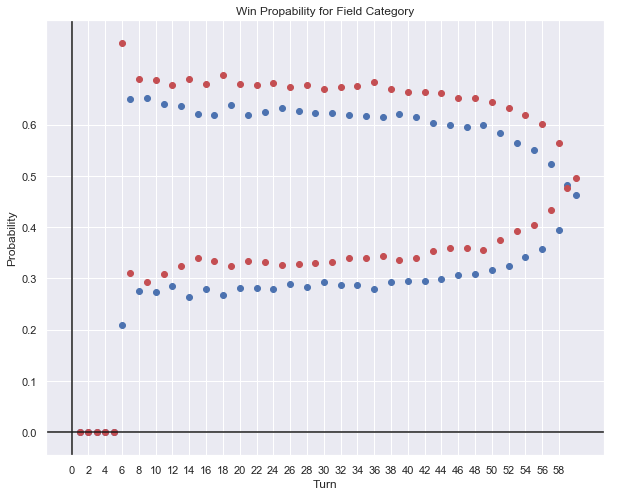

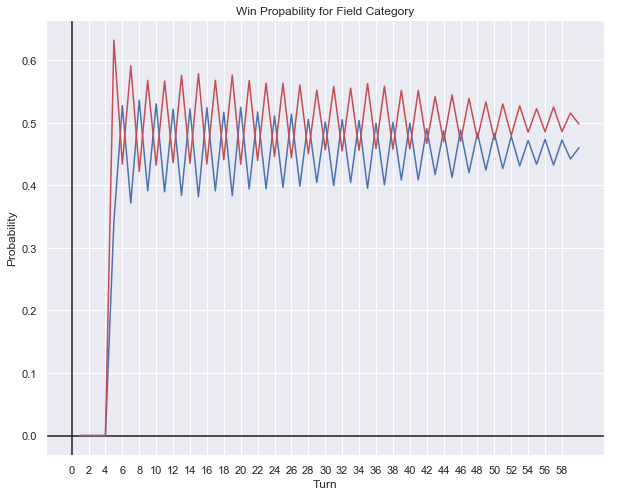

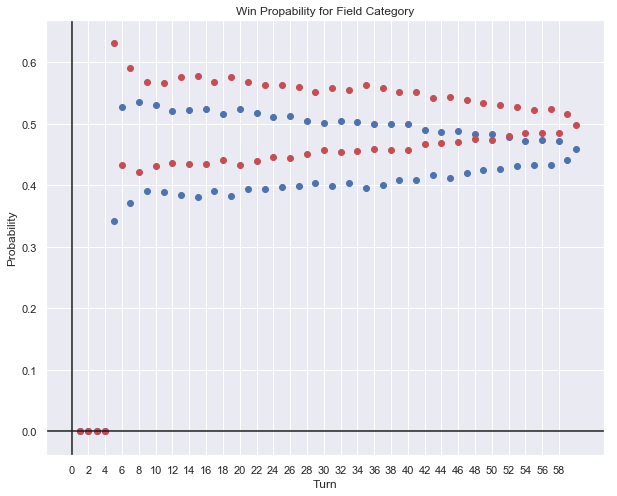

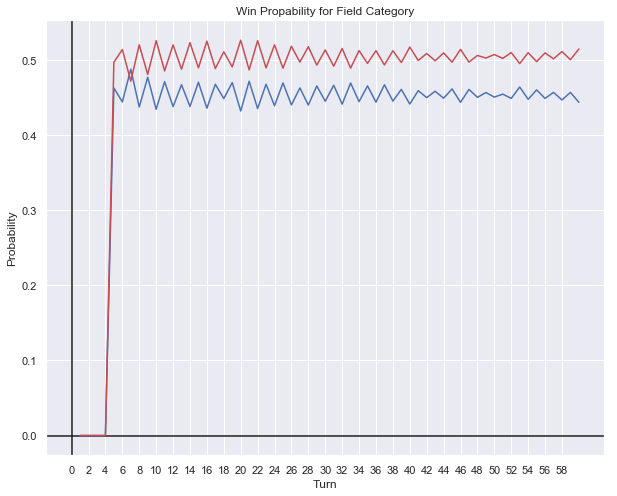

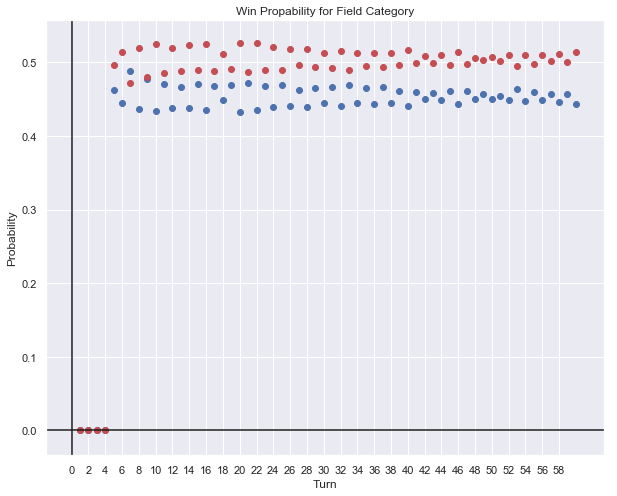

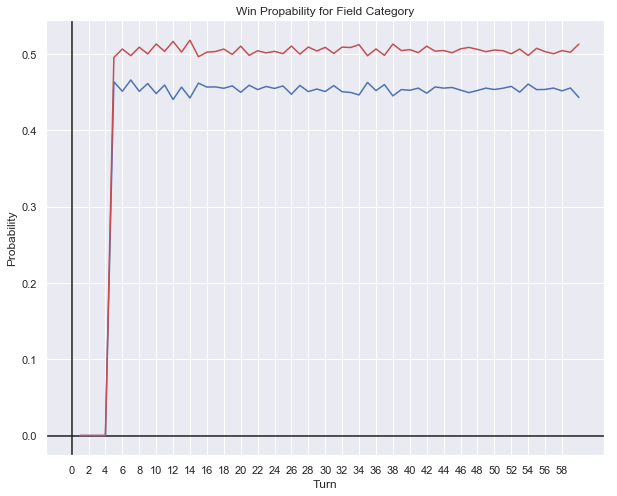

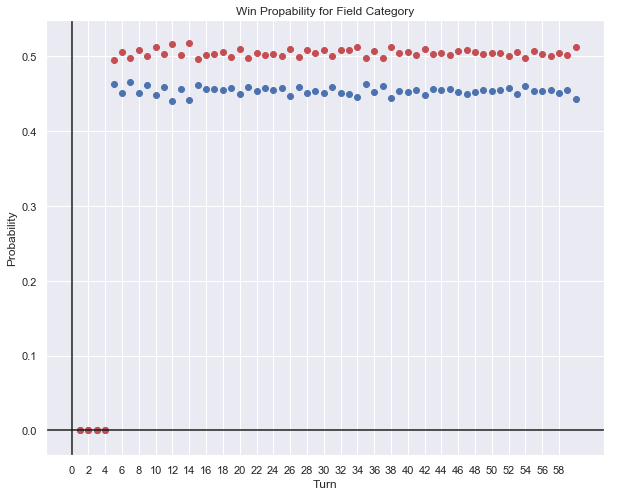

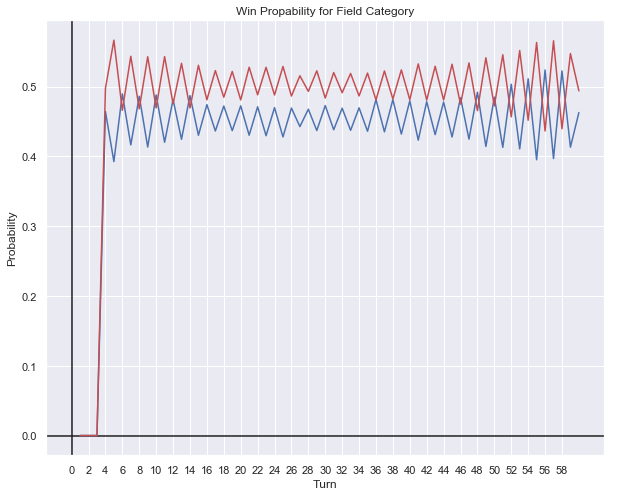

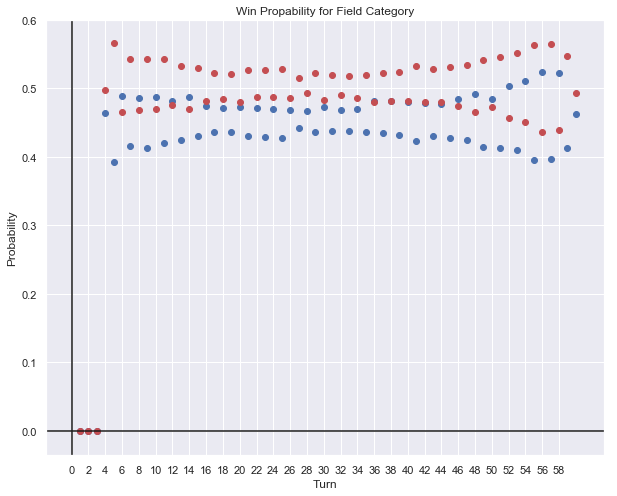

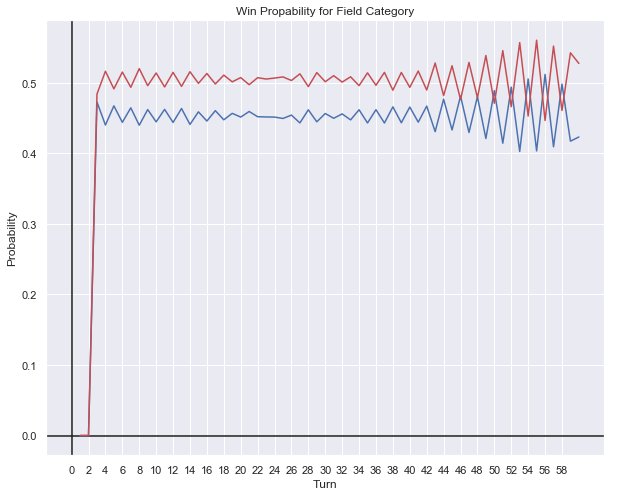

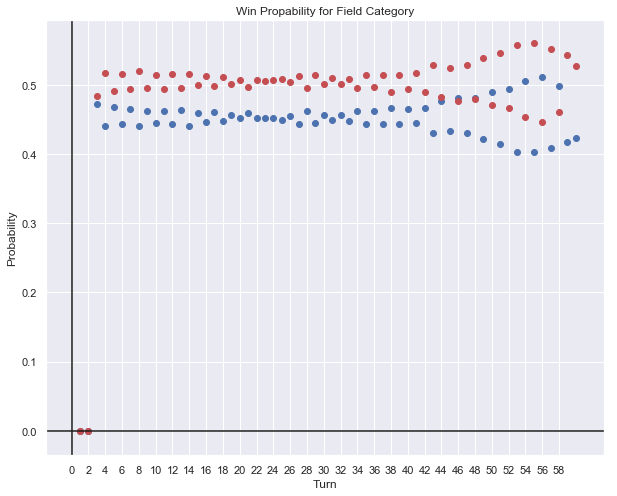

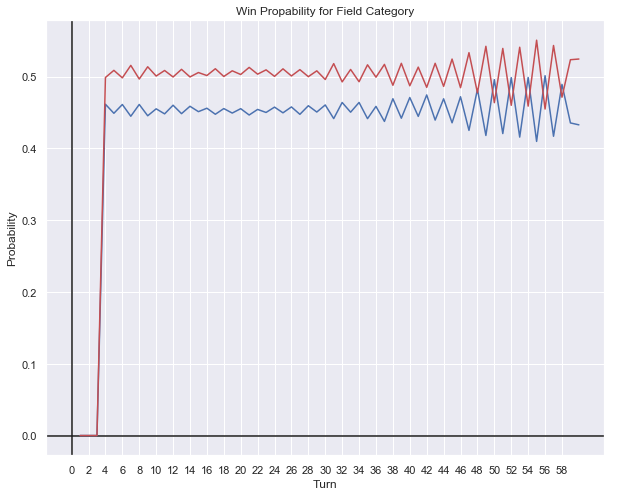

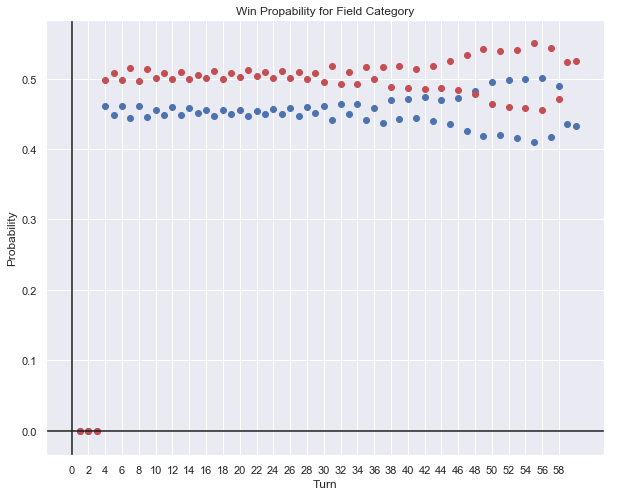

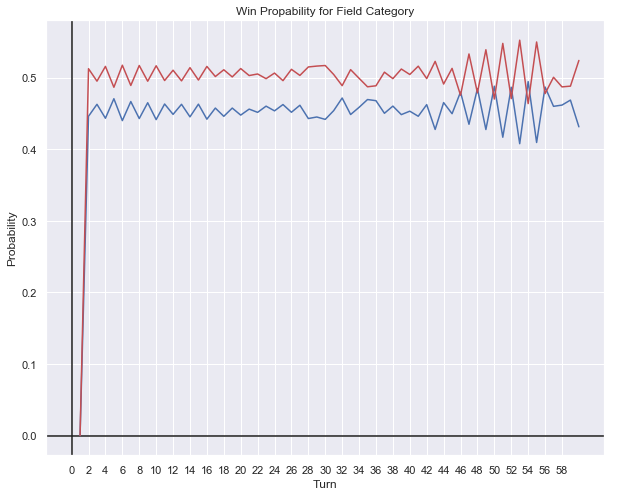

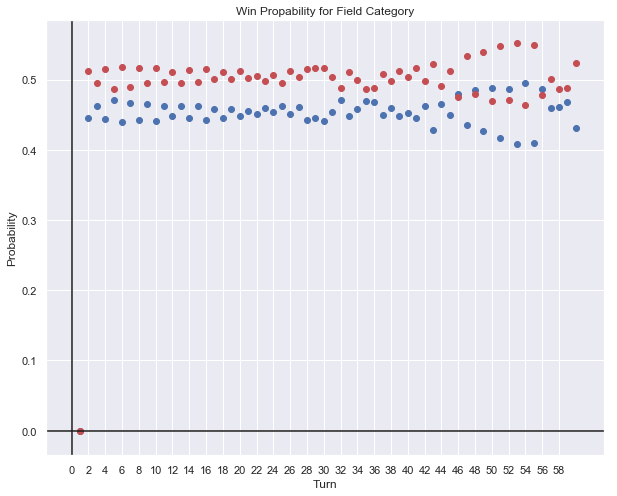

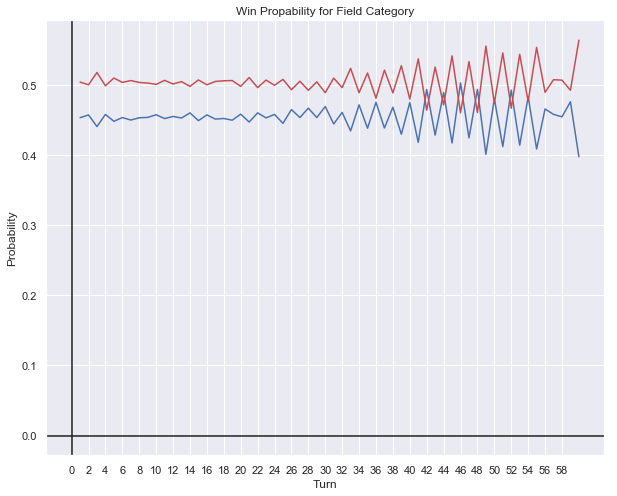

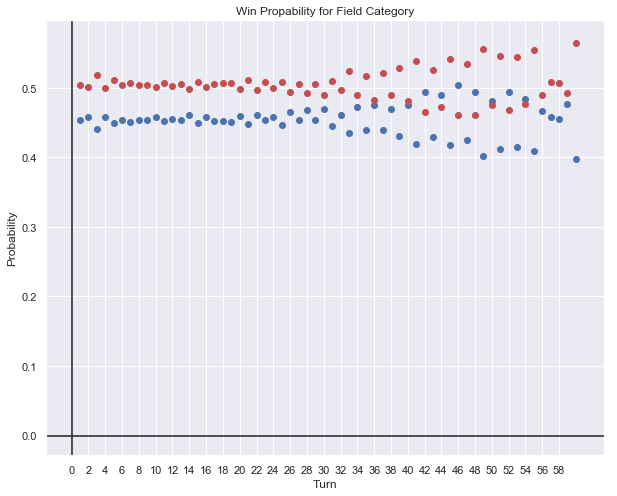

In [13]:
for category in range(9):
    plot_category(category)
    plot_category_scatter(category)